## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906
0:	learn: 0.9539248	total: 73.8ms	remaining: 1m 13s
1:	learn: 0.9222490	total: 74.1ms	remaining: 37s
2:	learn: 0.8954502	total: 74.4ms	remaining: 24.7s
3:	learn: 0.8656409	total: 74.7ms	remaining: 18.6s
4:	learn: 0.8413038	total: 74.9ms	remaining: 14.9s
5:	learn: 0.8138187	total: 75.8ms	remaining: 12.6s
6:	learn: 0.7917538	total: 75.9ms	remaining: 10.8s
7:	learn: 0.7691378	total: 76.2ms	remaining: 9.45s
8:	learn: 0.7440835	total: 76.7ms	remaining: 8.44s
9:	learn: 0.7204691	total: 77.3ms	remaining: 7.66s
10:	learn: 0.6979470	total: 78ms	remaining: 7.01s
11:	learn: 0.6754134	total: 78.6ms	remaining: 6.47s
12:	learn: 0.6561715	total: 79.2ms	remaining: 6.01s
13:	learn: 0.6377498	total: 83.7ms	remaining: 5.89s
14:	learn: 0.6178922	total: 86.1ms	remaining: 5.65s
15:	learn: 0.5999686	total: 86.9ms	remaining: 5.35s
16:	learn: 0.5813110	total: 87.5ms	remaining: 5.06s
17:	learn: 0.5638670	total: 88.2ms	remaining: 4.81s
18:	learn: 0.5483337	total: 88.9ms	remaining: 4

100:	learn: 0.0843801	total: 150ms	remaining: 1.34s
101:	learn: 0.0832787	total: 151ms	remaining: 1.33s
102:	learn: 0.0815245	total: 152ms	remaining: 1.32s
103:	learn: 0.0801572	total: 153ms	remaining: 1.31s
104:	learn: 0.0791564	total: 153ms	remaining: 1.31s
105:	learn: 0.0785048	total: 154ms	remaining: 1.3s
106:	learn: 0.0773646	total: 154ms	remaining: 1.29s
107:	learn: 0.0766486	total: 155ms	remaining: 1.28s
108:	learn: 0.0756556	total: 155ms	remaining: 1.27s
109:	learn: 0.0748267	total: 156ms	remaining: 1.26s
110:	learn: 0.0737527	total: 156ms	remaining: 1.25s
111:	learn: 0.0728525	total: 158ms	remaining: 1.25s
112:	learn: 0.0715030	total: 161ms	remaining: 1.26s
113:	learn: 0.0703584	total: 161ms	remaining: 1.25s
114:	learn: 0.0692824	total: 163ms	remaining: 1.25s
115:	learn: 0.0680922	total: 163ms	remaining: 1.24s
116:	learn: 0.0671585	total: 164ms	remaining: 1.24s
117:	learn: 0.0664770	total: 164ms	remaining: 1.23s
118:	learn: 0.0655016	total: 165ms	remaining: 1.22s
119:	learn: 0

191:	learn: 0.0427341	total: 266ms	remaining: 1.12s
192:	learn: 0.0425869	total: 279ms	remaining: 1.17s
193:	learn: 0.0424699	total: 280ms	remaining: 1.16s
194:	learn: 0.0423278	total: 280ms	remaining: 1.16s
195:	learn: 0.0421891	total: 280ms	remaining: 1.15s
196:	learn: 0.0420475	total: 281ms	remaining: 1.14s
197:	learn: 0.0419345	total: 281ms	remaining: 1.14s
198:	learn: 0.0417884	total: 282ms	remaining: 1.13s
199:	learn: 0.0416821	total: 282ms	remaining: 1.13s
200:	learn: 0.0414915	total: 286ms	remaining: 1.14s
201:	learn: 0.0414038	total: 287ms	remaining: 1.13s
202:	learn: 0.0413196	total: 287ms	remaining: 1.13s
203:	learn: 0.0411816	total: 288ms	remaining: 1.13s
204:	learn: 0.0410315	total: 290ms	remaining: 1.12s
205:	learn: 0.0409046	total: 291ms	remaining: 1.12s
206:	learn: 0.0408034	total: 291ms	remaining: 1.11s
207:	learn: 0.0407312	total: 292ms	remaining: 1.11s
208:	learn: 0.0405999	total: 293ms	remaining: 1.11s
209:	learn: 0.0405253	total: 293ms	remaining: 1.1s
210:	learn: 0

264:	learn: 0.0342321	total: 368ms	remaining: 1.02s
265:	learn: 0.0341334	total: 368ms	remaining: 1.02s
266:	learn: 0.0340595	total: 369ms	remaining: 1.01s
267:	learn: 0.0339147	total: 369ms	remaining: 1.01s
268:	learn: 0.0338135	total: 370ms	remaining: 1s
269:	learn: 0.0336591	total: 370ms	remaining: 1s
270:	learn: 0.0334663	total: 371ms	remaining: 997ms
271:	learn: 0.0333873	total: 371ms	remaining: 993ms
272:	learn: 0.0332582	total: 374ms	remaining: 996ms
273:	learn: 0.0330821	total: 376ms	remaining: 995ms
274:	learn: 0.0329658	total: 378ms	remaining: 997ms
275:	learn: 0.0328915	total: 379ms	remaining: 993ms
276:	learn: 0.0328170	total: 381ms	remaining: 994ms
277:	learn: 0.0327354	total: 385ms	remaining: 1s
278:	learn: 0.0325738	total: 386ms	remaining: 997ms
279:	learn: 0.0324827	total: 386ms	remaining: 993ms
280:	learn: 0.0323933	total: 387ms	remaining: 989ms
281:	learn: 0.0323067	total: 387ms	remaining: 986ms
282:	learn: 0.0322450	total: 390ms	remaining: 989ms
283:	learn: 0.0321519

325:	learn: 0.0286152	total: 490ms	remaining: 1.01s
326:	learn: 0.0285537	total: 491ms	remaining: 1.01s
327:	learn: 0.0284776	total: 492ms	remaining: 1.01s
328:	learn: 0.0283799	total: 493ms	remaining: 1s
329:	learn: 0.0283210	total: 494ms	remaining: 1s
330:	learn: 0.0282414	total: 494ms	remaining: 998ms
331:	learn: 0.0281564	total: 496ms	remaining: 998ms
332:	learn: 0.0280678	total: 500ms	remaining: 1s
333:	learn: 0.0280197	total: 502ms	remaining: 1s
334:	learn: 0.0279641	total: 502ms	remaining: 996ms
335:	learn: 0.0279095	total: 503ms	remaining: 994ms
336:	learn: 0.0278410	total: 505ms	remaining: 993ms
337:	learn: 0.0277522	total: 506ms	remaining: 990ms
338:	learn: 0.0277148	total: 506ms	remaining: 987ms
339:	learn: 0.0276631	total: 507ms	remaining: 985ms
340:	learn: 0.0275751	total: 509ms	remaining: 983ms
341:	learn: 0.0274927	total: 511ms	remaining: 983ms
342:	learn: 0.0274521	total: 511ms	remaining: 980ms
343:	learn: 0.0273877	total: 513ms	remaining: 979ms
344:	learn: 0.0273365	to

417:	learn: 0.0238680	total: 603ms	remaining: 840ms
418:	learn: 0.0238495	total: 604ms	remaining: 837ms
419:	learn: 0.0238274	total: 604ms	remaining: 834ms
420:	learn: 0.0237951	total: 605ms	remaining: 831ms
421:	learn: 0.0237779	total: 608ms	remaining: 833ms
422:	learn: 0.0237328	total: 608ms	remaining: 830ms
423:	learn: 0.0237066	total: 609ms	remaining: 827ms
424:	learn: 0.0236650	total: 609ms	remaining: 824ms
425:	learn: 0.0236243	total: 610ms	remaining: 822ms
426:	learn: 0.0235993	total: 610ms	remaining: 819ms
427:	learn: 0.0235775	total: 611ms	remaining: 816ms
428:	learn: 0.0235484	total: 611ms	remaining: 814ms
429:	learn: 0.0235213	total: 649ms	remaining: 860ms
430:	learn: 0.0234821	total: 652ms	remaining: 861ms
431:	learn: 0.0234656	total: 653ms	remaining: 859ms
432:	learn: 0.0234243	total: 654ms	remaining: 857ms
433:	learn: 0.0233871	total: 655ms	remaining: 854ms
434:	learn: 0.0233184	total: 655ms	remaining: 851ms
435:	learn: 0.0232957	total: 655ms	remaining: 848ms
436:	learn: 

484:	learn: 0.0215595	total: 709ms	remaining: 753ms
485:	learn: 0.0215293	total: 711ms	remaining: 752ms
486:	learn: 0.0215053	total: 712ms	remaining: 750ms
487:	learn: 0.0214641	total: 712ms	remaining: 747ms
488:	learn: 0.0214351	total: 712ms	remaining: 744ms
489:	learn: 0.0213959	total: 718ms	remaining: 747ms
490:	learn: 0.0213619	total: 719ms	remaining: 745ms
491:	learn: 0.0213083	total: 720ms	remaining: 743ms
492:	learn: 0.0212858	total: 722ms	remaining: 743ms
493:	learn: 0.0212559	total: 724ms	remaining: 741ms
494:	learn: 0.0212090	total: 724ms	remaining: 739ms
495:	learn: 0.0211816	total: 726ms	remaining: 738ms
496:	learn: 0.0211550	total: 727ms	remaining: 736ms
497:	learn: 0.0211291	total: 728ms	remaining: 734ms
498:	learn: 0.0210981	total: 729ms	remaining: 732ms
499:	learn: 0.0210685	total: 730ms	remaining: 730ms
500:	learn: 0.0210488	total: 731ms	remaining: 728ms
501:	learn: 0.0210184	total: 733ms	remaining: 727ms
502:	learn: 0.0209948	total: 733ms	remaining: 724ms
503:	learn: 

578:	learn: 0.0191720	total: 832ms	remaining: 605ms
579:	learn: 0.0191346	total: 835ms	remaining: 605ms
580:	learn: 0.0191039	total: 836ms	remaining: 603ms
581:	learn: 0.0190850	total: 837ms	remaining: 601ms
582:	learn: 0.0190654	total: 837ms	remaining: 599ms
583:	learn: 0.0190548	total: 839ms	remaining: 598ms
584:	learn: 0.0190220	total: 839ms	remaining: 595ms
585:	learn: 0.0190001	total: 840ms	remaining: 594ms
586:	learn: 0.0189831	total: 841ms	remaining: 591ms
587:	learn: 0.0189725	total: 841ms	remaining: 589ms
588:	learn: 0.0189456	total: 844ms	remaining: 589ms
589:	learn: 0.0189257	total: 845ms	remaining: 587ms
590:	learn: 0.0188793	total: 845ms	remaining: 585ms
591:	learn: 0.0188610	total: 845ms	remaining: 582ms
592:	learn: 0.0188241	total: 845ms	remaining: 580ms
593:	learn: 0.0188049	total: 846ms	remaining: 578ms
594:	learn: 0.0187973	total: 846ms	remaining: 576ms
595:	learn: 0.0187674	total: 846ms	remaining: 574ms
596:	learn: 0.0187440	total: 846ms	remaining: 571ms
597:	learn: 

677:	learn: 0.0171242	total: 957ms	remaining: 455ms
678:	learn: 0.0171042	total: 958ms	remaining: 453ms
679:	learn: 0.0170694	total: 960ms	remaining: 452ms
680:	learn: 0.0170467	total: 960ms	remaining: 450ms
681:	learn: 0.0170003	total: 960ms	remaining: 448ms
682:	learn: 0.0169737	total: 961ms	remaining: 446ms
683:	learn: 0.0169648	total: 961ms	remaining: 444ms
684:	learn: 0.0169573	total: 961ms	remaining: 442ms
685:	learn: 0.0169351	total: 962ms	remaining: 440ms
686:	learn: 0.0169070	total: 962ms	remaining: 438ms
687:	learn: 0.0168991	total: 964ms	remaining: 437ms
688:	learn: 0.0168850	total: 966ms	remaining: 436ms
689:	learn: 0.0168697	total: 971ms	remaining: 436ms
690:	learn: 0.0168518	total: 971ms	remaining: 434ms
691:	learn: 0.0168362	total: 972ms	remaining: 433ms
692:	learn: 0.0168316	total: 973ms	remaining: 431ms
693:	learn: 0.0168178	total: 974ms	remaining: 429ms
694:	learn: 0.0168042	total: 974ms	remaining: 427ms
695:	learn: 0.0167603	total: 974ms	remaining: 426ms
696:	learn: 

765:	learn: 0.0155318	total: 1.08s	remaining: 329ms
766:	learn: 0.0155209	total: 1.08s	remaining: 327ms
767:	learn: 0.0155070	total: 1.08s	remaining: 326ms
768:	learn: 0.0154959	total: 1.08s	remaining: 324ms
769:	learn: 0.0154810	total: 1.08s	remaining: 323ms
770:	learn: 0.0154728	total: 1.08s	remaining: 321ms
771:	learn: 0.0154604	total: 1.08s	remaining: 319ms
772:	learn: 0.0154399	total: 1.08s	remaining: 318ms
773:	learn: 0.0154286	total: 1.08s	remaining: 316ms
774:	learn: 0.0154173	total: 1.08s	remaining: 314ms
775:	learn: 0.0153833	total: 1.08s	remaining: 313ms
776:	learn: 0.0153702	total: 1.08s	remaining: 311ms
777:	learn: 0.0153594	total: 1.08s	remaining: 310ms
778:	learn: 0.0153395	total: 1.09s	remaining: 308ms
779:	learn: 0.0153293	total: 1.09s	remaining: 307ms
780:	learn: 0.0153142	total: 1.09s	remaining: 305ms
781:	learn: 0.0153025	total: 1.09s	remaining: 304ms
782:	learn: 0.0152872	total: 1.09s	remaining: 303ms
783:	learn: 0.0152694	total: 1.09s	remaining: 301ms
784:	learn: 

862:	learn: 0.0141943	total: 1.2s	remaining: 191ms
863:	learn: 0.0141779	total: 1.2s	remaining: 189ms
864:	learn: 0.0141535	total: 1.2s	remaining: 188ms
865:	learn: 0.0141458	total: 1.2s	remaining: 186ms
866:	learn: 0.0141345	total: 1.2s	remaining: 185ms
867:	learn: 0.0141131	total: 1.21s	remaining: 183ms
868:	learn: 0.0140917	total: 1.21s	remaining: 182ms
869:	learn: 0.0140782	total: 1.21s	remaining: 180ms
870:	learn: 0.0140682	total: 1.21s	remaining: 180ms
871:	learn: 0.0140664	total: 1.22s	remaining: 178ms
872:	learn: 0.0140494	total: 1.22s	remaining: 177ms
873:	learn: 0.0140314	total: 1.22s	remaining: 176ms
874:	learn: 0.0140298	total: 1.22s	remaining: 174ms
875:	learn: 0.0140215	total: 1.22s	remaining: 172ms
876:	learn: 0.0140105	total: 1.22s	remaining: 171ms
877:	learn: 0.0139916	total: 1.22s	remaining: 169ms
878:	learn: 0.0139829	total: 1.22s	remaining: 168ms
879:	learn: 0.0139724	total: 1.22s	remaining: 166ms
880:	learn: 0.0139525	total: 1.22s	remaining: 165ms
881:	learn: 0.013

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.02287819993584495
ABC Pre-generator MAE 0.8567146843883069


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

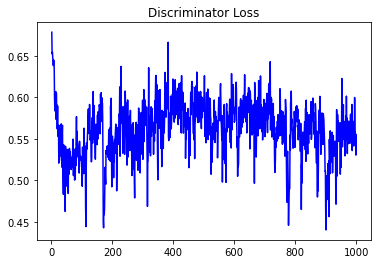

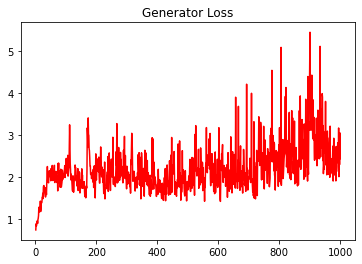

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.057734160284910886


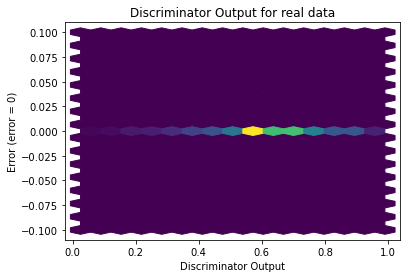

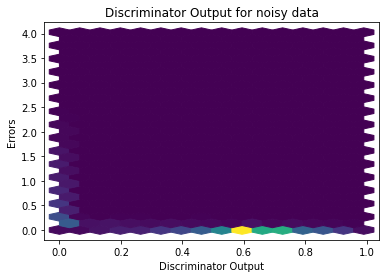

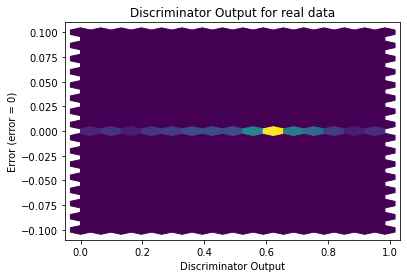

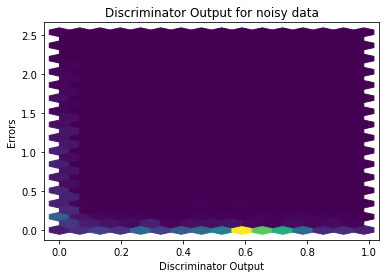

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


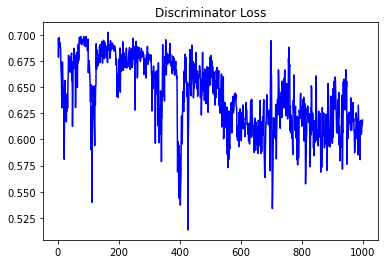

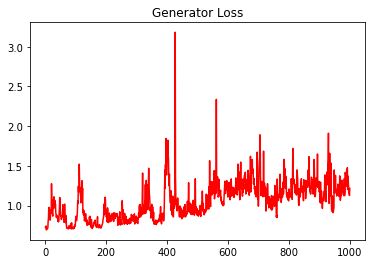

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.13343513582433972


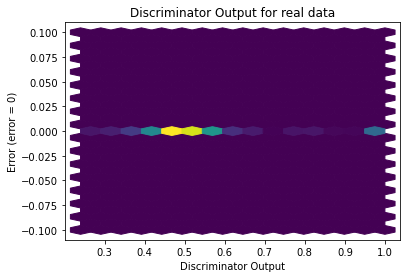

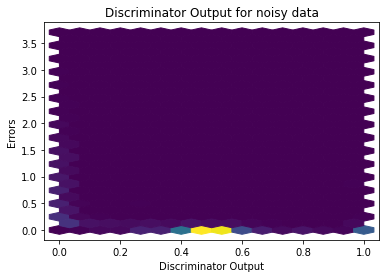

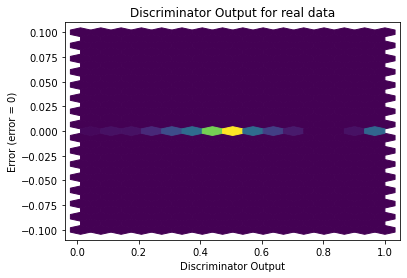

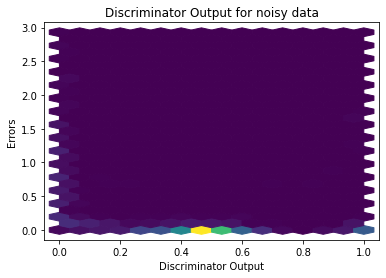

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


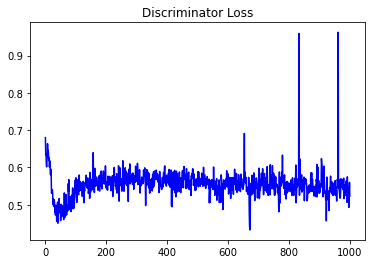

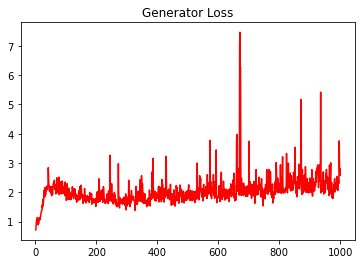

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.15496667334108383


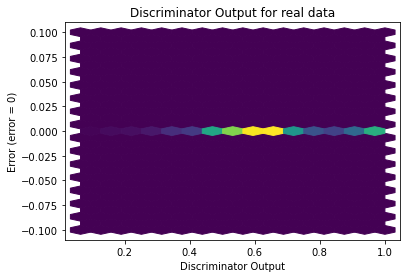

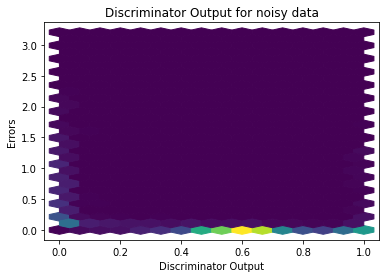

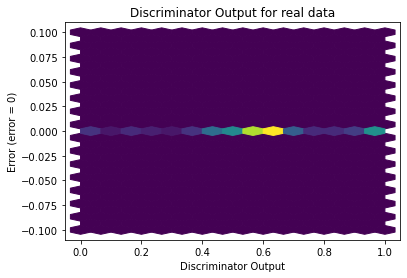

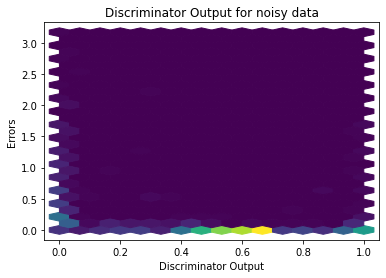

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9834]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9950]], requires_grad=True)
